In [2]:
%matplotlib notebook

import scipy
from scipy import interpolate
import numpy as np

In [3]:
data = ([[-6,-59,70],
[-43,41,80],
[52,28,87],
[8,-51,118],
[-36.5,-24.5,139],
[-27,38.5,149],
[26.5,51,152],
[63,6.5,158],
[-12,-37,195],
[8,48,215],
[65,-13,215],
[-14,-21,248],
[38,29.5,290],
[45,-49,310],
[-32,-17.5,334],
[26,24,379],
[26,-56,394],
[-38,-12.5,415],
[26,-4,461],
[-20,-64,485],
[-38,11,514],
[26.5,-21,552],
[-38,-46,566],
[-18,21,578],
[7.5,-26.5,627],
[-52,-7.5,649],
[-11,42,656],
[13,-9,679],
[-38,23,709],
[28,34,711],
[-2,-16,744],
[-29,31,772],
[31,37,781],
[11,-23,801],
[-26,28,836],
[41,17,848],
[-8,-17.5,867],
[-3,29,902],
[31,-12,923],
[-11,-12,950],
[10,21,986]])


In [4]:
t_data = np.transpose(data)

<IPython.core.display.Javascript object>


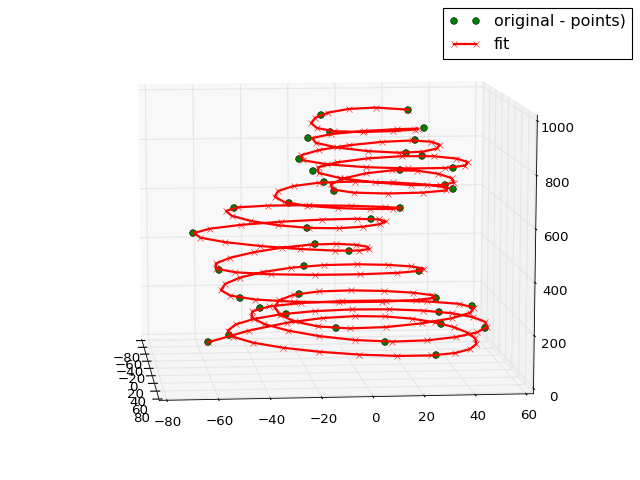

In [21]:

spacing = 200
#now we get all the knots and info about the interpolated spline
tck, u= interpolate.splprep(t_data)
#here we generate the new interpolated dataset, 
#increase the resolution by increasing the spacing, 500 in this example
new = interpolate.splev(np.linspace(0,1,spacing), tck)

#now lets plot it!
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(t_data[0], t_data[1], t_data[2], marker='o', label='original - points)', lw =0, c='green')
ax.plot(new[0], new[1], new[2], marker='x', label='fit', lw =2, c='red')
ax.legend()
plt.savefig('original.png')
plt.show()

In [23]:
from scipy.spatial import distance
tot_dst = 0

for point in range(0, spacing-1):
    a = (new[0][point], new[1][point], new[2][point])
    b = (new[0][point +1 ], new[1][point +1], new[2][point +1])
    tot_dst += distance.euclidean(a,b)
    
tot_dst = tot_dst / 100

print("Samlet længde: ", dst, " [m]")

Samlet længde:  30.440356773462067  [m]


<IPython.core.display.Javascript object>


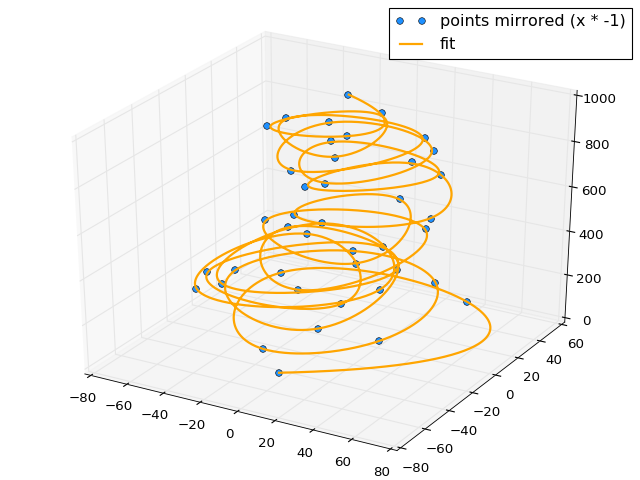

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(t_data[0] * -1, t_data[1], t_data[2], marker='o', label='points mirrored (x * -1)', lw =0, c='Dodgerblue')
ax.plot(new[0] * -1, new[1], new[2], label='fit', lw =2, c='orange')
ax.legend()
plt.savefig('mirror.png')
plt.show()